# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
170500096/170498071 [==============================] - 23s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

&lt;matplotlib.image.AxesImage at 0x1925372f9b0&gt;

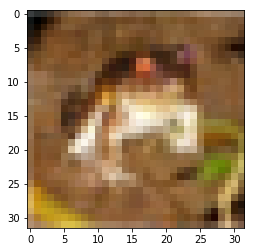

In [5]:
# FROG
plt.imshow(x_train[0])

&lt;matplotlib.image.AxesImage at 0x192537ef940&gt;

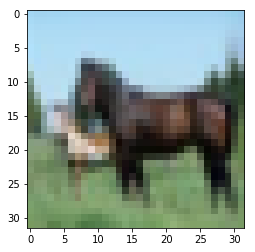

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [24]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 23s 456us/step - loss: 1.5227 - acc: 0.4530
Epoch 2/10
50000/50000 [==============================] - 22s 431us/step - loss: 1.1710 - acc: 0.5902
Epoch 3/10
50000/50000 [==============================] - 23s 464us/step - loss: 1.0223 - acc: 0.6453
Epoch 4/10
50000/50000 [==============================] - 22s 434us/step - loss: 0.9198 - acc: 0.6827
Epoch 5/10
50000/50000 [==============================] - 20s 408us/step - loss: 0.8351 - acc: 0.7126
Epoch 6/10
50000/50000 [==============================] - 22s 434us/step - loss: 0.7702 - acc: 0.7383
Epoch 7/10
50000/50000 [==============================] - 21s 420us/step - loss: 0.7147 - acc: 0.7577
Epoch 8/10
50000/50000 [==============================] - 22s 449us/step - loss: 0.6644 - acc: 0.7754
Epoch 9/10
50000/50000 [==============================] - 22s 449us/step - loss: 0.6248 - acc: 0.7855
Epoch 10/10
50000/50000 [==============================] - 22s 436us/step - loss: 

&lt;keras.callbacks.History at 0x19254e390b8&gt;

In [26]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [25]:
model.metrics_names

[&#39;loss&#39;, &#39;acc&#39;]

In [26]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 165us/step


[1.155599568271637, 0.6658]

In [27]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.65      0.71      1000
          1       0.86      0.76      0.81      1000
          2       0.71      0.38      0.50      1000
          3       0.53      0.40      0.45      1000
          4       0.46      0.79      0.59      1000
          5       0.54      0.62      0.58      1000
          6       0.73      0.78      0.76      1000
          7       0.84      0.62      0.71      1000
          8       0.75      0.80      0.78      1000
          9       0.67      0.85      0.75      1000

avg / total       0.69      0.67      0.66     10000



## Optional: Large Model

In [29]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
50000/50000 [==============================] - 74s 1ms/step - loss: 1.6143 - acc: 0.4204
Epoch 2/20
50000/50000 [==============================] - 71s 1ms/step - loss: 1.1737 - acc: 0.5892
Epoch 3/20
50000/50000 [==============================] - 74s 1ms/step - loss: 1.0125 - acc: 0.6482
Epoch 4/20
50000/50000 [==============================] - 71s 1ms/step - loss: 0.9463 - acc: 0.6768
Epoch 5/20
50000/50000 [==============================] - 75s 1ms/step - loss: 0.9187 - acc: 0.6902
Epoch 6/20
50000/50000 [==============================] - 80s 2ms/step - loss: 0.9103 - acc: 0.6926
Epoch 7/20
50000/50000 [==============================] - 72s 1ms/step - loss: 0.8963 - acc: 0.7009
Epoch 8/20
50000/50000 [==============================] - 74s 1ms/step - loss: 0.8797 - acc: 0.7067
Epoch 9/20
50000/50000 [==============================] - 75s 1ms/step - loss: 0.8757 - acc: 0.7086
Epoch 10/20
50000/50000 [==============================] - 75s 2ms/step - loss: 0.8668 - acc: 0.7116

&lt;keras.callbacks.History at 0x192bf1e1a58&gt;

In [31]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 6s 646us/step


[1.057723906803131, 0.6763]

In [32]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [33]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.59      0.68      1000
          1       0.86      0.80      0.83      1000
          2       0.65      0.54      0.59      1000
          3       0.39      0.75      0.51      1000
          4       0.55      0.75      0.64      1000
          5       0.73      0.48      0.58      1000
          6       0.75      0.70      0.72      1000
          7       0.89      0.62      0.73      1000
          8       0.74      0.84      0.79      1000
          9       0.88      0.69      0.77      1000

avg / total       0.72      0.68      0.68     10000



In [38]:
model.save('larger_CIFAR10_model.h5')

___